In [32]:
import os
os.environ["TFF_CPP_MIN_LOG_LEVEL"] = "2"
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [2]:
# dataset_url = "https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction"
# od.download(dataset_url)

In [3]:
df = pd.read_csv(r"D:\Dummy\Customer_Churn_Prediction_ANN\credit-card-customer-churn-prediction\Churn_Modelling.csv")
df.shape

(10000, 14)

In [4]:
pd.concat([df.head(), df.sample(3), df.tail()])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
111,112,15665790,Rowntree,538,Germany,Male,39,7,108055.10,2,1,0,27231.26,0
9518,9519,15714920,Balashov,585,Germany,Male,44,7,163867.86,1,1,1,112333.22,0
7483,7484,15784526,Chen,616,France,Male,44,5,102016.38,1,0,1,178235.37,1
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [5]:
df = df.iloc[:,3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
X = df.drop(columns=['Exited'])
y =  df.Exited

In [12]:
X.shape

(10000, 10)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [14]:
preprocessor = ColumnTransformer(transformers=[
    ('num_scale', StandardScaler(), X.select_dtypes(include=np.number).columns),
    ('cat_ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), X.select_dtypes(exclude=np.number).columns)
], remainder="passthrough")

In [15]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [16]:
X_train.shape

(8000, 11)

In [22]:
model = keras.Sequential([
    keras.Input(shape=(11,)),
    keras.layers.Dense(512, activation=keras.activations.relu),
    keras.layers.Dense(256, activation=keras.activations.relu),
    keras.layers.Dense(1,activation=keras.activations.sigmoid)
], name="Credit_card_churn_prediction_ann_model")

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "Credit_card_churn_prediction_ann_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               6144      
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 137729 (538.00 KB)
Trainable params: 137729 (538.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001, verbose=1)

In [23]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=callback)

Epoch 1/50
250/250 [==============================] - 3s 6ms/step - loss: 0.3960 - accuracy: 0.8361 - val_loss: 0.3557 - val_accuracy: 0.8510
Epoch 2/50
250/250 [==============================] - 1s 5ms/step - loss: 0.3498 - accuracy: 0.8577 - val_loss: 0.3534 - val_accuracy: 0.8625
Epoch 3/50
250/250 [==============================] - 1s 6ms/step - loss: 0.3428 - accuracy: 0.8571 - val_loss: 0.3424 - val_accuracy: 0.8630
Epoch 4/50
250/250 [==============================] - 1s 5ms/step - loss: 0.3356 - accuracy: 0.8593 - val_loss: 0.3420 - val_accuracy: 0.8560
Epoch 5/50
250/250 [==============================] - 1s 5ms/step - loss: 0.3327 - accuracy: 0.8589 - val_loss: 0.3432 - val_accuracy: 0.8650
Epoch 6/50
250/250 [==============================] - 1s 6ms/step - loss: 0.3287 - accuracy: 0.8635 - val_loss: 0.3374 - val_accuracy: 0.8650
Epoch 7/50
250/250 [==============================] - 1s 6ms/step - loss: 0.3237 - accuracy: 0.8626 - val_loss: 0.3504 - val_accuracy: 0.8585
Epoch 

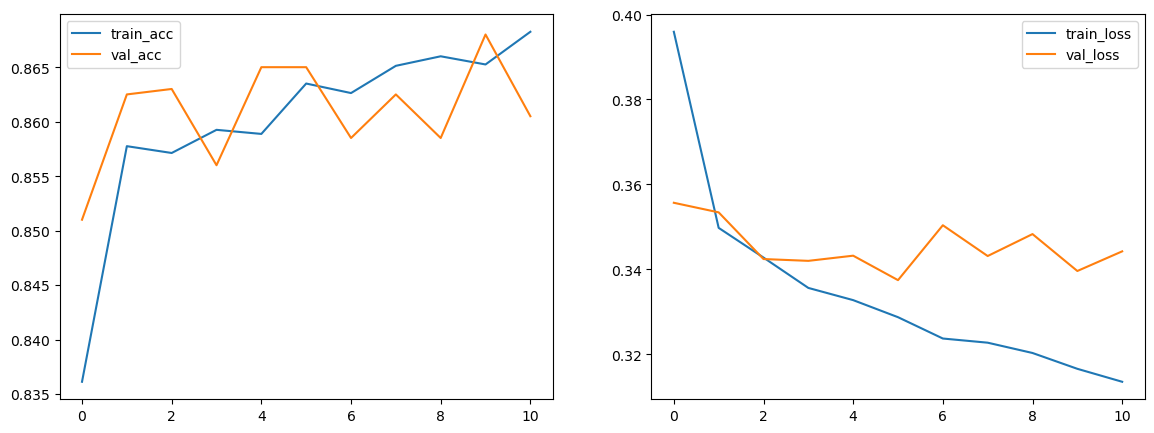

In [29]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.subplot(122)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.show()

In [33]:
y_pred = np.argmax(model.predict(X_test), axis=1)

63/63 [==============================] - 0s 2ms/step


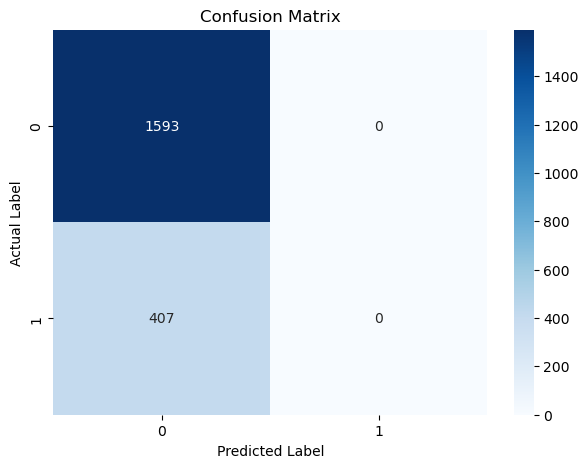

In [45]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# After seeing the confusion matrix, we can clearly see that the model performance is very bad even if it got acc above 85%